## Wine Scores: Do they reflect climate in the vineyards?

**Question:**

Is there any correlation between weather conditions (namely, temperature and precipitation) and wine scores given by critics (a presumable indicator/proxy for wine quality/value)?

**Wine region: Bordeaux, France**

**Data sources:**

***Daily temperature (since 1970):*** 
NOAA National Centers for Environmental Information (GHCN: Global Historical Climatological Network)

***Wine scores: Wine Spectator magazine (1985-2016)***

In [1]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import and clean up weather data

In [2]:
weather = pd.read_csv('weather.csv')

/Users/cwchen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (13,19,21,23,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
weather.head(3)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES
0,FR000007510,"BORDEAUX MERIGNAC, FR",44.8306,0.6914,47.0,1970-01-01,0.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FR000007510,"BORDEAUX MERIGNAC, FR",44.8306,0.6914,47.0,1970-01-02,0.0,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FR000007510,"BORDEAUX MERIGNAC, FR",44.8306,0.6914,47.0,1970-01-03,4.3,",,E",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather[weather['LATITUDE']==44.8306].count().head(3)

STATION     18258
NAME        18258
LATITUDE    18258
dtype: int64

In [5]:
bd_temp = weather.iloc[0:18257]

In [6]:
bd_temp = bd_temp[['DATE','PRCP','TMAX','TMIN']]

In [7]:
bd_temp['DATE']=pd.to_datetime(bd_temp['DATE'])

bd_temp['YEAR']=bd_temp['DATE'].apply(lambda time: time.year)
bd_temp['MONTH']=bd_temp['DATE'].apply(lambda time: time.month)
bd_temp['DAY']=bd_temp['DATE'].apply(lambda time: time.day)

bd_temp = bd_temp[(bd_temp['YEAR']>=1985) & (bd_temp['YEAR']<=2016)]

In [8]:
bd_temp.head(3)

,DATE,PRCP,TMAX,TMIN,YEAR,MONTH,DAY
5479,1985-01-01,0.0,8.6,2.1,1985,1,1
5480,1985-01-02,0.0,6.7,-0.7,1985,1,2
5481,1985-01-03,0.0,5.9,-5.0,1985,1,3


In [9]:
bd_temp.reset_index(drop=True,inplace=True)

#bd_temp.set_index('DATE').head(3)

In [10]:
bd_temp.head(3)

,DATE,PRCP,TMAX,TMIN,YEAR,MONTH,DAY
0,1985-01-01,0.0,8.6,2.1,1985,1,1
1,1985-01-02,0.0,6.7,-0.7,1985,1,2
2,1985-01-03,0.0,5.9,-5.0,1985,1,3


In [11]:
bd_temp['TAVG']=bd_temp[['TMAX','TMIN']].mean(axis=1)

In [12]:
bd_temp.head(3)

,DATE,PRCP,TMAX,TMIN,YEAR,MONTH,DAY,TAVG
0,1985-01-01,0.0,8.6,2.1,1985,1,1,5.35
1,1985-01-02,0.0,6.7,-0.7,1985,1,2,3.00
2,1985-01-03,0.0,5.9,-5.0,1985,1,3,0.45


**Create pivot table**

In [13]:
bd_p=bd_temp.pivot_table(index='YEAR',columns='MONTH',values=['PRCP','TMAX','TMIN','TAVG'],aggfunc={
    'PRCP':np.sum,'TMAX':np.mean,'TMIN':np.mean,'TAVG':np.mean})

In [157]:
bd_p.head(10)

Attribute   PRCP                                                         \
MONTH          1      2      3      4      5      6     7      8      9   
YEAR                                                                      
1985        69.8   84.8  114.9   75.8  137.6   43.6  73.4   33.6    3.6   
1986       202.7   76.4   51.2  157.2   41.6   10.9   5.0   45.8  125.4   
1987        28.5   54.2   76.1   43.0   24.2   84.2  86.4   40.1   75.0   
1988       225.0  110.8  121.8   73.4  112.9   70.6  49.0   16.0   42.8   
1989        28.6   90.0   43.0  163.9   39.8   26.2  43.4   51.6   33.6   
1990        73.4  155.0    4.4   83.0   29.6   73.0  25.2   20.4   60.0   
1991        42.4   55.6   39.8   67.0   81.4   53.4  88.6   17.2  165.3   
1992        25.2   16.0   79.2   66.2   48.4  167.4  73.0  248.0   93.6   
1993        13.8    2.8   14.8  128.8   66.8  131.2  47.0   30.2  247.9   
1994       176.4  109.2   17.8  130.6  104.2  101.4  55.6   45.0  175.0   

Attribute         ...       TMIN                                              \
MONTH         10  ...          5          6          7          8          9   
YEAR              ...                                                          
1985        14.0  ...   9.074194  12.536667  15.700000  12.593548  12.173333   
1986        74.8  ...  10.267742  12.740000  14.216129  13.319355  11.703333   
1987       142.2  ...   8.803226  12.493333  15.858065  14.996774  14.473333   
1988        49.2  ...  11.883871  13.600000  14.135484  14.874194  12.360000   
1989        32.8  ...  12.332258  13.423333  16.251613  15.558065  12.310000   
1990       178.4  ...  12.429032  13.716667  15.812903  16.590323  13.123333   
1991       144.6  ...   9.987097  12.440000  16.090323  17.090323  15.370000   
1992       145.4  ...  11.787097  13.463333  16.316129  16.861290  12.673333   
1993       129.2  ...  11.058065  14.680000  14.087097  14.974194  12.170000   
1994        60.8  ...  10.635484  13.806667  17.132258  17.790323  12.860000   

Attribute                                PRCP_Annual Wine_Score  
MONTH             10        11        12                         
YEAR                                                             
1985        8.645161  1.996667  2.561290       825.3         93  
1986       10.790323  4.843333  3.474194       954.4         95  
1987       11.141935  5.356667  4.477419       788.3         76  
1988       10.229032  4.100000  3.761290       943.1         93  
1989        9.793548  7.236667  5.725806       667.9         98  
1990       11.290323  7.363333  1.196774       906.0         97  
1991        8.787097  6.076667  1.900000       978.1         72  
1992        9.206452  9.086667  5.058065      1230.6         72  
1993        9.409677  3.683333  6.451613      1089.1         82  
1994       10.900000  9.063333  6.596774      1156.0         85  

[10 rows x 50 columns]

In [15]:
bd_p.columns.names=['Attribute','MONTH']

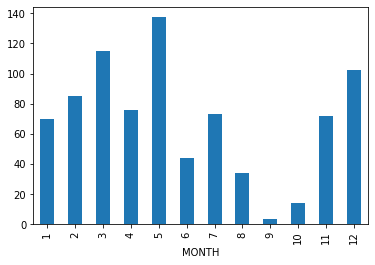

In [16]:
bd_p.loc[1985]['PRCP'].plot('bar')

In [100]:
# From wine score data (shown later), the vintages 1991 and 2010 have the lowerest and highest score, respectively.

bd_p.loc[[1991, 2010]]['PRCP']

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1991,42.4,55.6,39.8,67.0,81.4,53.4,88.6,17.2,165.3,144.6,185.2,37.6
2010,77.8,54.0,67.7,26.8,40.7,101.5,15.4,16.6,23.8,93.2,214.6,79.9


In [98]:
test = bd_p.loc[[1991, 2010]]['PRCP'].unstack()

In [149]:
#test.plot('bar')

In [127]:
testdf = test.to_frame()

In [135]:
testdf.reset_index(inplace=True)

In [136]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
MONTH    24 non-null int64
YEAR     24 non-null int64
0        24 non-null float64
dtypes: float64(1), int64(2)
memory usage: 656.0 bytes


In [150]:
testdf.columns=['Month','Year','PRCP']

In [151]:
testdf.head(3)

,Month,Year,PRCP
0,1,1991,42.4
1,1,2010,77.8
2,2,1991,55.6


Text(0, 0.5, 'Accumulated Precipitation (mm)')

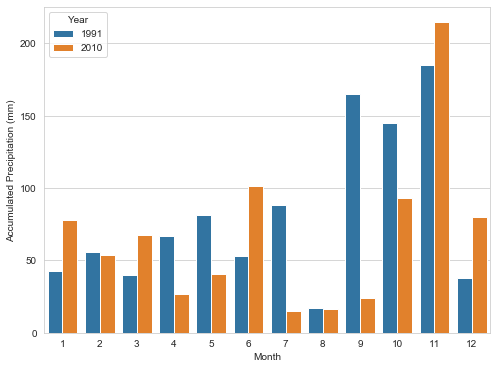

In [148]:
plt.figure(figsize=(8,6))
sns.barplot(x='Month',y='PRCP',hue='Year',data=testdf)
plt.ylabel('Accumulated Precipitation (mm)')

>
> **The vintage 1991 saw much more rain than that in 2010. Excess rain could degrade grape quality.**
>

In [155]:
#sns.scatterplot(x='Month',y='PRCP',hue='Year',data=testdf)
#plt.ylabel('Accumulated Precipitation (mm)')

In [156]:
#testdf.head(3)

In [17]:
bd_p['PRCP_Annual']=bd_p.PRCP.sum(axis=1)

### Now import wine score data

In [41]:
ws = pd.read_csv('WS_score_Napa_Cab_Bordeaux_LB_1985-2016.txt',sep=" ")

In [42]:
ws.head(3)

,Vintage,Napa_Valley,Bordeaux
0,2016,98,97
1,2015,94,94
2,2014,95,93


In [43]:
ws.drop('Napa_Valley',axis=1,inplace=True)

In [44]:
ws.head(3)

,Vintage,Bordeaux
0,2016,97
1,2015,94
2,2014,93


In [45]:
ws = ws.iloc[::-1].reset_index(drop=True)

In [46]:
ws.head(3)

,Vintage,Bordeaux
0,1985,93
1,1986,95
2,1987,76


In [47]:
bd_p['Wine_Score']=ws['Bordeaux'].values

In [48]:
bd_p.head(3)

Attribute   PRCP                                                             \
MONTH          1     2      3      4      5     6     7     8      9     10   
YEAR                                                                          
1985        69.8  84.8  114.9   75.8  137.6  43.6  73.4  33.6    3.6   14.0   
1986       202.7  76.4   51.2  157.2   41.6  10.9   5.0  45.8  125.4   74.8   
1987        28.5  54.2   76.1   43.0   24.2  84.2  86.4  40.1   75.0  142.2   

Attribute  ...       TMIN                                              \
MONTH      ...          5          6          7          8          9   
YEAR       ...                                                          
1985       ...   9.074194  12.536667  15.700000  12.593548  12.173333   
1986       ...  10.267742  12.740000  14.216129  13.319355  11.703333   
1987       ...   8.803226  12.493333  15.858065  14.996774  14.473333   

Attribute                                PRCP_Annual Wine_Score  
MONTH             10        11        12                         
YEAR                                                             
1985        8.645161  1.996667  2.561290       825.3         93  
1986       10.790323  4.843333  3.474194       954.4         95  
1987       11.141935  5.356667  4.477419       788.3         76  

[3 rows x 50 columns]

In [49]:
bd_p[['Wine_Score','PRCP_Annual']].corr()

,Attribute,Wine_Score,PRCP_Annual
,MONTH,,
Attribute,MONTH,,
Wine_Score,,1.000000,-0.369876
PRCP_Annual,,-0.369876,1.000000


### EDA

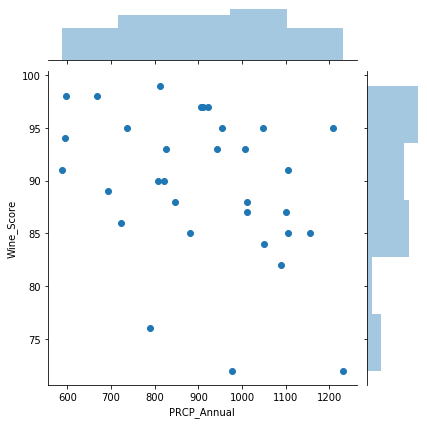

In [50]:
sns.jointplot(x='PRCP_Annual',y='Wine_Score',data=bd_p,kind='scatter')

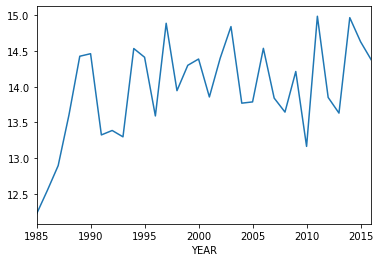

In [51]:
bd_p.TAVG.mean(axis=1).plot()

In [52]:
bd_temp.head(3)

,DATE,PRCP,TMAX,TMIN,YEAR,MONTH,DAY,TAVG
0,1985-01-01,0.0,8.6,2.1,1985,1,1,5.35
1,1985-01-02,0.0,6.7,-0.7,1985,1,2,3.00
2,1985-01-03,0.0,5.9,-5.0,1985,1,3,0.45


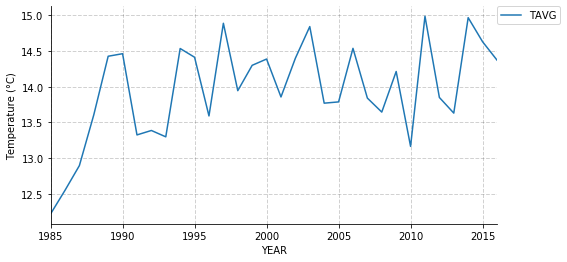

In [53]:
plt.figure(figsize=(8,4))
bd_p.TAVG.mean(axis=1).plot(label='TAVG')
plt.legend(bbox_to_anchor=(1,1),loc=2,borderaxespad=0.)

ax = plt.gca()
ax.grid(color= (0.1,0.1,0.1), linestyle='--',linewidth=1, alpha=0.2)
plt.autoscale(enable=True,axis='x',tight=True)
plt.ylabel('Temperature (°C)')
sns.despine()

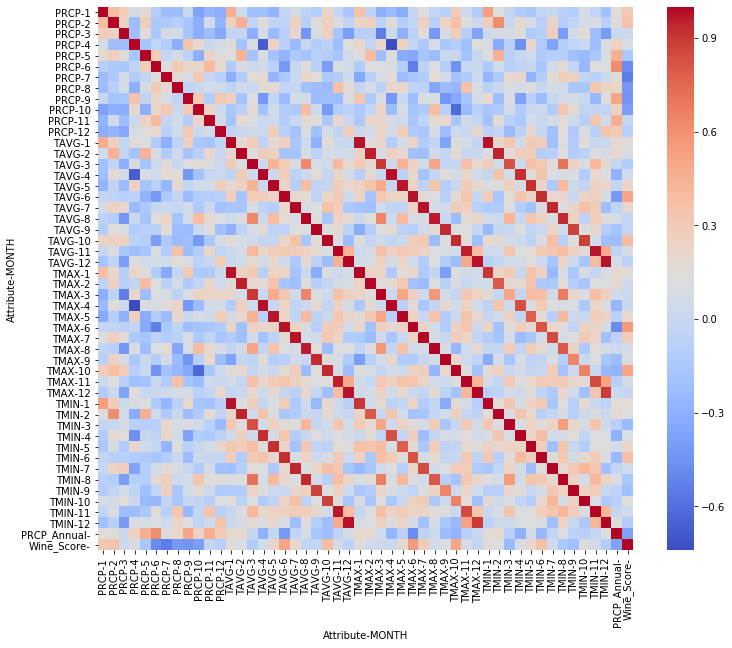

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(bd_p.corr(),cmap='coolwarm')

>
> **Wine score is somewhat correlated (~0.6) with PRCP 6-10, particularly PRCP 7.**
>

In [44]:
#s = bd_p.corr().abs().unstack().unstack().sort_values(ascending=False)
#s = bd_p.sort_values()

In [45]:
#len(s)

3900

In [47]:
#s[(s >= 0.6) & (s < 0.9)]

### Now explore seasonality

In [55]:
bds = pd.DataFrame()

for j,i in enumerate(range(1,11,3)):
    q = j+1
    bds['PRCP_Q'+str(q)] = bd_p.PRCP[[i,i+1,i+2]].sum(axis=1)

In [56]:
bds.head(3)

,PRCP_Q1,PRCP_Q2,PRCP_Q3,PRCP_Q4
YEAR,,,,
1985,269.5,257.0,110.6,188.2
1986,330.3,209.7,176.2,238.2
1987,158.8,151.4,201.5,276.6


In [57]:
for j,i in enumerate(range(1,11,3)):
    q = j+1
    bds['TAVG_Q'+str(q)] = bd_p.TAVG[[i,i+1,i+2]].mean(axis=1)

In [58]:
for j,i in enumerate(range(1,11,3)):
    q = j+1
    bds['TMAX_Q'+str(q)] = bd_p.TMAX[[i,i+1,i+2]].mean(axis=1)

In [59]:
for j,i in enumerate(range(1,11,3)):
    q = j+1
    bds['TMIN_Q'+str(q)] = bd_p.TMIN[[i,i+1,i+2]].mean(axis=1)

In [60]:
bds['PRCP_Annual']=bd_p.PRCP_Annual

In [61]:
bds['Wine_Score'] = bd_p.Wine_Score

In [62]:
len(bds.columns)

18

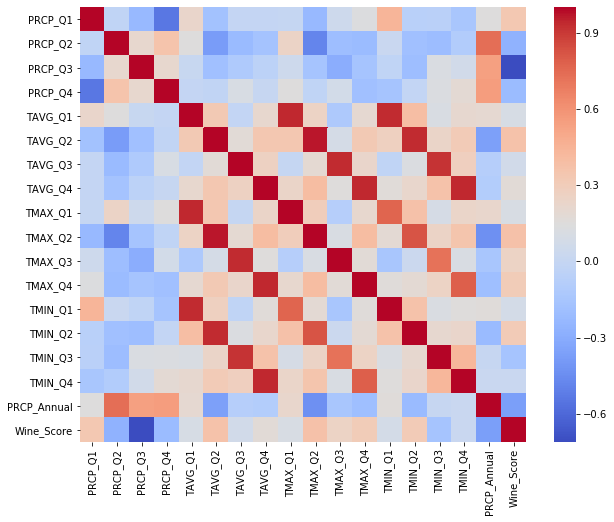

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(bds.corr(),cmap='coolwarm')

>
> **Wine socre is more correlated with PRCP_Q3.**
>

In [64]:
bds.corr()

,PRCP_Q1,PRCP_Q2,PRCP_Q3,PRCP_Q4,TAVG_Q1,TAVG_Q2,TAVG_Q3,TAVG_Q4,TMAX_Q1,TMAX_Q2,TMAX_Q3,TMAX_Q4,TMIN_Q1,TMIN_Q2,TMIN_Q3,TMIN_Q4,PRCP_Annual,Wine_Score
PRCP_Q1,1.000000,-0.022781,-0.226338,-0.539828,0.230731,-0.170192,-0.003376,-0.007761,0.003386,-0.227311,0.045423,0.137314,0.441080,-0.068382,-0.059845,-0.148326,0.148360,0.333590
PRCP_Q2,-0.022781,1.000000,0.215646,0.363924,0.144579,-0.378664,-0.217852,-0.165814,0.247217,-0.481173,-0.199580,-0.215159,0.019675,-0.188084,-0.205096,-0.099732,0.738781,-0.267205
PRCP_Q3,-0.226338,0.215646,1.000000,0.214932,0.012567,-0.185689,-0.111140,-0.045795,0.047434,-0.162004,-0.294481,-0.156900,-0.025465,-0.200370,0.120397,0.067468,0.541557,-0.711203
PRCP_Q4,-0.539828,0.363924,0.214932,1.000000,-0.002781,-0.021914,0.104873,0.005633,0.147454,-0.027554,0.073721,-0.183913,-0.159802,-0.011311,0.124844,0.189777,0.558656,-0.216151
TAVG_Q1,0.230731,0.144579,0.012567,-0.002781,1.000000,0.327046,-0.012702,0.216964,0.943955,0.255954,-0.118354,0.201921,0.938338,0.395860,0.112687,0.208095,0.204046,0.099019
TAVG_Q2,-0.170192,-0.378664,-0.185689,-0.021914,0.327046,1.000000,0.172456,0.342434,0.342458,0.970471,0.088381,0.330354,0.271539,0.935730,0.243662,0.317071,-0.360824,0.367593
TAVG_Q3,-0.003376,-0.217852,-0.111140,0.104873,-0.012702,0.172456,1.000000,0.271195,0.001478,0.191677,0.938592,0.228730,-0.026025,0.125820,0.915203,0.283175,-0.078574,0.070501
TAVG_Q4,-0.007761,-0.165814,-0.045795,0.005633,0.216964,0.342434,0.271195,1.000000,0.238961,0.399987,0.154402,0.943612,0.167810,0.221485,0.365162,0.946506,-0.092298,0.175532
TMAX_Q1,0.003386,0.247217,0.047434,0.147454,0.943955,0.342458,0.001478,0.238961,1.000000,0.294752,-0.076661,0.216263,0.771636,0.375419,0.092511,0.235167,0.221702,0.107505
TMAX_Q2,-0.227311,-0.481173,-0.162004,-0.027554,0.255954,0.970471,0.191677,0.399987,0.294752,1.000000,0.117171,0.401471,0.184509,0.823018,0.248697,0.355160,-0.431674,0.377356


In [65]:
s = bds.corr().abs().unstack().sort_values(ascending=False)

In [66]:
len(s)

324

In [67]:
s[(s >= 0.6) & (s < 0.9)]

TMAX_Q2      TMIN_Q2        0.823018
TMIN_Q2      TMAX_Q2        0.823018
TMAX_Q4      TMIN_Q4        0.786309
TMIN_Q4      TMAX_Q4        0.786309
TMAX_Q1      TMIN_Q1        0.771636
TMIN_Q1      TMAX_Q1        0.771636
PRCP_Annual  PRCP_Q2        0.738781
PRCP_Q2      PRCP_Annual    0.738781
TMIN_Q3      TMAX_Q3        0.719957
TMAX_Q3      TMIN_Q3        0.719957
PRCP_Q3      Wine_Score     0.711203
Wine_Score   PRCP_Q3        0.711203
dtype: float64

> **For Bordeaux,**
>
> **Wine score is proportional with the precipitaion in the third quarter (July-Sept) (~0.7)**
> **right before/in the beginning of the harvest**

In [68]:
bds.head(3)

,PRCP_Q1,PRCP_Q2,PRCP_Q3,PRCP_Q4,TAVG_Q1,TAVG_Q2,TAVG_Q3,TAVG_Q4,TMAX_Q1,TMAX_Q2,TMAX_Q3,TMAX_Q4,TMIN_Q1,TMIN_Q2,TMIN_Q3,TMIN_Q4,PRCP_Annual,Wine_Score
YEAR,,,,,,,,,,,,,,,,,,
1985,269.5,257.0,110.6,188.2,5.481471,14.577706,19.781219,9.028638,9.790092,19.554014,26.073477,13.656237,1.172849,9.601398,13.488961,4.401039,825.3,93
1986,330.3,209.7,176.2,238.2,6.287423,13.968656,19.281882,10.651290,10.048886,18.880287,25.484158,14.933297,2.525960,9.057025,13.079606,6.369283,954.4,95
1987,158.8,151.4,201.5,276.6,5.319124,14.959570,20.711237,10.587849,9.038018,19.980287,26.313082,14.183692,1.600230,9.938853,15.109391,6.992007,788.3,76


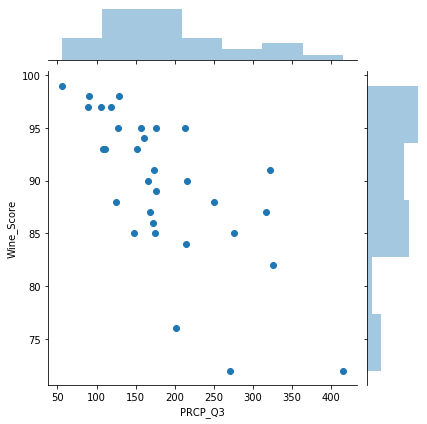

In [69]:
sns.jointplot(x='PRCP_Q3',y='Wine_Score',data=bds)

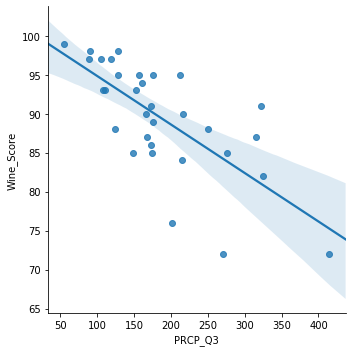

In [70]:
sns.lmplot(x='PRCP_Q3',y='Wine_Score',data=bds)

In [51]:
#store = pd.HDFStore('store.h5')

In [71]:
#store['bd_p'] = bd_p

In [53]:
#store['bds'] = bds

In [54]:
#store['bd_temp'] = bd_temp

In [72]:
bds.columns

Index(['PRCP_Q1', 'PRCP_Q2', 'PRCP_Q3', 'PRCP_Q4', 'TAVG_Q1', 'TAVG_Q2',
       'TAVG_Q3', 'TAVG_Q4', 'TMAX_Q1', 'TMAX_Q2', 'TMAX_Q3', 'TMAX_Q4',
       'TMIN_Q1', 'TMIN_Q2', 'TMIN_Q3', 'TMIN_Q4', 'PRCP_Annual',
       'Wine_Score'],
      dtype='object')

### Training and Testing Data
#### An attempt with simple regression analysis for potential correlations between wine scores and climate

In [73]:
y = bds['Wine_Score']

X = bds[['PRCP_Q1', 'PRCP_Q2', 'PRCP_Q3', 'TMAX_Q2']]

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.01801288 -0.01490933 -0.0390493   1.66891513]


### Predicting Test Data

In [80]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

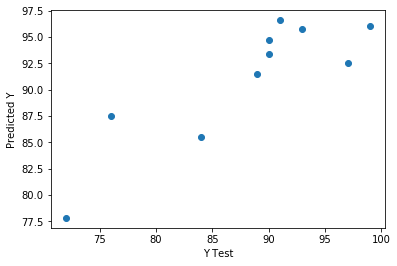

In [81]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the Model

In [82]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.530052936080492
MSE: 27.6394719182269
RMSE: 5.257325548054533


### Visualizing Residuals

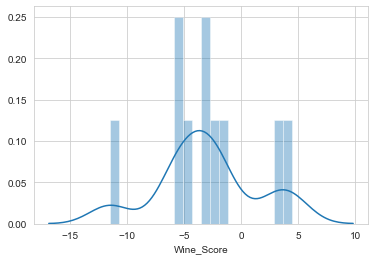

In [83]:
sns.set_style('whitegrid')
sns.distplot(y_test-predictions, bins=20)

In [84]:
coeffs = pd.DataFrame(lm.coef_,X.columns)
coeffs.columns=['Coefficient']
coeffs

,Coefficient
PRCP_Q1,0.018013
PRCP_Q2,-0.014909
PRCP_Q3,-0.039049
TMAX_Q2,1.668915


### Conclusions

- **Wine scores may not be closely/directly correlated with temperature and precipitation.**

- **Linear regression may not be effective enough to predict wine score from weather condtions.**

- **Other weather parameters may play more important roles (e.g., degree days) that can be further explored.**

### Next step

**Create a web-based interactive application where visitors can request to plot weather conditions in various wine regions and vintages.**